<img src='stats/img/topbar.png' />

## 9. Séries Temporais

__CONTEÚDO:__<br>
* [9. Conceito](#0.)
* [9.1 Aplicação 1: Passageiros de Vôos](#1.)

<a id="0."></a><br>
### 9. Conceitos

- Coleção de observações de atributos vinculados e ordenados por um atributo de tempo.
- Uma série temporal pode ser decomposta em **Tendência**, **Sazonalidade** e um componente **Aleatório**.

- Tendência: apresenta o comportamento de longo prazo.
- Sazonalidade: componente que reproduz padrões regulares no tempo.
- Aleatoriedade: representa outros efeitos não capturados pelos demais componentes, ou ainda erros adquiridos na geração dos dados.

<img src='stats/img/serie-temporal.png' width=700 />

<a id="1."></a><br>
### 9.1 Aplicação 1: Passageiros de Vôos 

__ETAPAS:__<br>
* [1. Preparação do problema](#1.)
* [2. Sumarizar Dados](#2.)
* [3. Preparar Dados](#3.)
* [4. Avaliar algoritmos](#4.)
* [5. Melhorar Modelo(s)](#5.)
* [6. Finalizar Modelo(s)](#6.)

<a id="1."></a><br>
#### 1. Preparação do problema
* a) Esclarecer o problema
* b) Carregar libraries
* c) Carregar dataset

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
#from pyramid.arima import auto_arima

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

dados = pd.read_csv('data/AirPassengers.csv', parse_dates=['Month'], index_col=['Month'], date_parser=dateparse)

D:\Programs\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


<a id="2."></a><br>
#### 2. Sumarizar Dados
* a) Estatística descritiva
* b) Visualização de dados e estrutura
* c) EDA

In [34]:
dados.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [43]:
dados.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [44]:
# Data Máxima
print(ts.index.max())
# Data Mínima
print(ts.index.min())

1960-12-01 00:00:00
1949-01-01 00:00:00


In [40]:
ts_ano = ts.resample('A').sum()
ts_ano

Month
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: A-DEC, Name: Passengers, dtype: int64

In [41]:
ts_mes = ts.groupby([lambda reg: reg.month]).mean()
ts_mes

1     241.750000
2     235.000000
3     270.166667
4     267.083333
5     271.833333
6     311.666667
7     351.333333
8     351.083333
9     302.416667
10    266.583333
11    232.833333
12    261.833333
Name: Passengers, dtype: float64

In [28]:
ts = dados['Passengers']

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


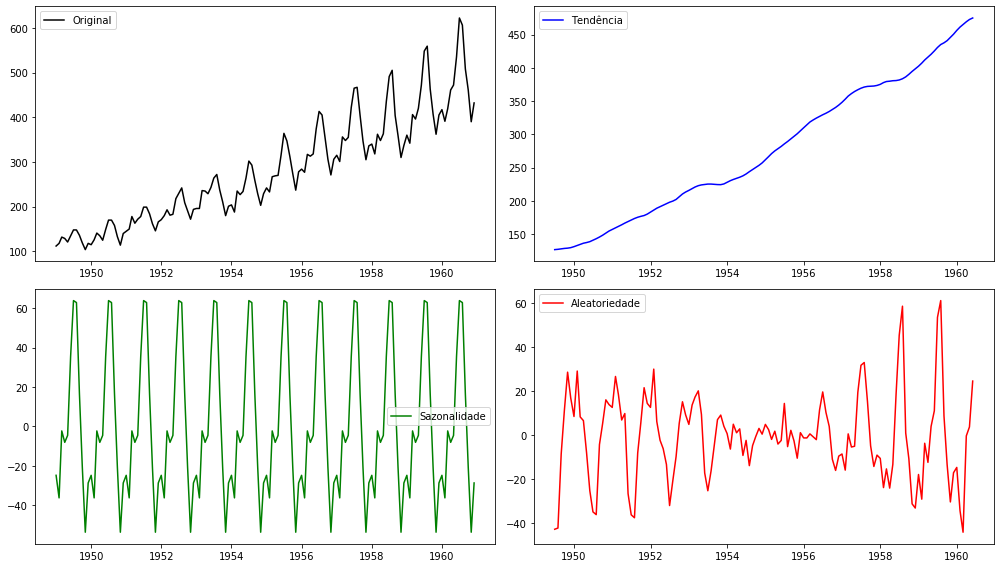

In [26]:
decomposicao = seasonal_decompose(ts)

tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.plot(ts, label='Original', c='black')
plt.legend(loc = 'best')

plt.subplot(2, 2, 2)
plt.plot(tendencia, label='Tendência', c='b')
plt.legend(loc = 'best')

plt.subplot(2, 2, 3)
plt.plot(sazonal, label='Sazonalidade', c='g')
plt.legend(loc = 'best')

plt.subplot(2, 2, 4)
plt.plot(aleatorio, label='Aleatoriedade', c='r')
plt.legend(loc = 'best')

plt.tight_layout()

<a id="3."></a><br>
#### 3. Preparar Dados
* a) Limpeza de dados
* b) Seleção de características
* c) Transformação dos dados
* d) Dividir conjunto de dados em partes de treino e teste/validação

In [46]:
# NA

<a id="4."></a><br>
#### 4. Avaliar algoritmos
* a) Treinar algoritmos com o conjunto de treino
* b) Avaliar desempenho no conjunto de teste e/ou validação

In [56]:
media_movel_3 = ts.rolling(window = 3).mean()
media_movel_6 = ts.rolling(window = 6).mean()
media_movel_12 = ts.rolling(window = 12).mean()

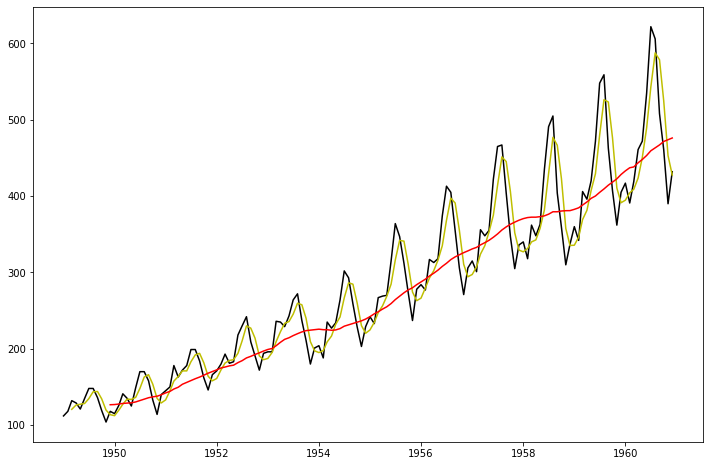

In [64]:
plt.figure(figsize=(12, 8))
plt.plot(ts, color='black')
plt.plot(media_movel_3, color='y')
plt.plot(media_movel_12, color='red')

<a id="5."></a><br>
#### 5. Melhorar Desempenho
* a) Verificar desempenho do(s) algoritmo(s) com os dados normalizados ou padronizados.
* b) Verificar desempenho do(s) algoritmo(s) em diferentes ajustes de parâmetros da técnica.
* c) Avaliar relevância de atributos x ruídos.

In [68]:
#Previsão usando ARIMA

# p: Número de termos autoregressivos
# q: janela da média móvel
# d: número de diferenças não sazonais

p = 2
q = 1
d = 2 
modelo = ARIMA(ts, order=(p, q, d))

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [70]:
modelo_treinado = modelo.fit()
print(modelo_treinado.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.715
Date:                Sat, 20 Jun 2020   AIC                           1344.043
Time:                        17:16:13   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5308      0.708      3.573      0.000       1.143       3.919
ar.L1.D.Passengers     1.6477      0.033     49.931      0.000       1.583       1.712
ar.L2.D.Passengers  

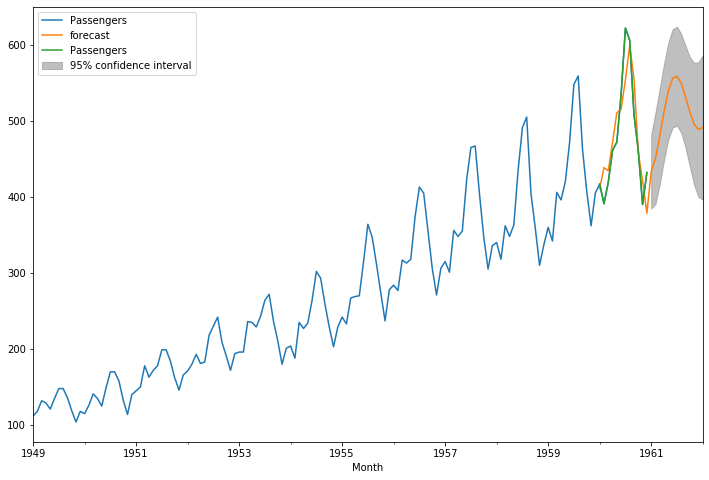

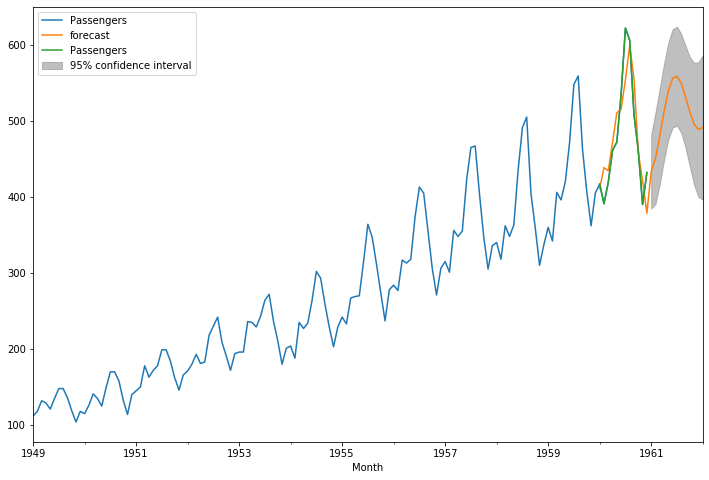

In [82]:
plt.figure(figsize=(12, 8))
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1962-01-01', ax = eixo, plot_insample=True)

<a id="6."></a><br>
#### 6. Finalizar Modelo
* a) Selecionar parâmetros ajustados do modelo
* b) Criar modelo standalone com o conjunto completo de treino
* c) Armazenar modelo para uso futuro

In [ ]:
from pickle import dump, load

# Salvar modelo 
filename = 'model.sav'
# dump([modelo], open(filename, 'wb'))

# Carregar modelo
# loaded_model = load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)